# ISOM5160 Project - Group7

- **Dataset:** amazon_food_reviews.csv
- **Topic:** AI Driven Personalized Product Improvement Recommendation System for Amazon Sellers
- **Individual Contribution:**

    | Name          | SID      | Contributions                                                                                                          |
    |---------------|----------|------------------------------------------------------------------------------------------------------------------------|
    | CAO, Xi       | 21271664 | 评论文本预处理 + 情感分析 + 评论关键词提取 +数据清洗                                                                                                 |
    | LI, Heyi      |          | 评论、评分异常值分析 （基于评论情感分析）、 PPT 统筹                                                                                          |
    | LIAO, Jingyu  | 21262106 | 差评原因分析   （基于评论关键词）                                                                                                     |
    | LIN, Chuwei   | 21237955 | 评分时间趋势分析                                                                                                               |
    | YE, Chenwei   | 21199517 | 用户评论权重分析                                                                                                               |
    | ZHANG, Ziyang | 21266920 | 1. Data scraping: additional amazon product info <br/>2. Analyse: Correlation Between Ratings and Product Descriptions |



## 0. Install requirements and do initialization
1. Install requirements and load `amazon_food_reviews.csv`
2. Scrape product info from *amazon.com*
3. Load product info and concat to original dataset

In [ ]:
# Run first to install requirements
!pip install -r requirements.txt

# Run this to speed up the data scraping process
!unzip -oq new_data.zip

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


from amazon_new_data_scraping import parallel_scrape_amazon_product_info, load_all_data_as_dataframe, \
    extract_comments_from_product_info
from data_cleaning import add_sentiment_score
from correlation_with_description_analyse import *

df_amazon_food_reviews = pd.read_csv('datasets/amazon_food_reviews.csv',
                                     converters={"Time": lambda x: pd.to_datetime(int(x), unit="s")})

In [2]:
product_id_list = list(df_amazon_food_reviews.ProductId.unique())
print(f"Total number of products: {len(product_id_list)}")
print("Start scraping data...")
parallel_scrape_amazon_product_info(product_id_list, replace=False)
print("Scraping finished.")
df_amazon_product_info = load_all_data_as_dataframe()
print("Product info loaded.")

# Optional: Comment it out if not needed in 4.3.3
df_amazon_product_info = add_sentiment_score(df_amazon_product_info, 'product_description')
print("Sentiment score loaded.")

df_amazon_product_info.sample(3)

Total number of products: 4322
Start scraping data...
Using 12 CPU cores for parallel scraping


Scraping amazon products: 100%|██████████| 4322/4322 [00:01<00:00, 3742.67it/s]


Successfully scraped 4322/4322 products
Scraping finished.


Loading product info: 100%|██████████| 4322/4322 [00:00<00:00, 10694.03it/s]


Product info loaded.
发现本地缓存模型，从 ./sentiment_model_cache 加载...


Adding sentiment score (using mps): 100%|██████████| 3381/3381 [00:27<00:00, 123.13it/s]

情感分数计算完成
Sentiment score loaded.


,product_id,product_title,byline_info,product_description,category,alt_images,product_detail,important_information,top_comments,CountAltImages,Score,ScoreDistribution,ScorePolarizationIndex,NumRatings,IsFood,sentiment_score
445,B000FVDWU4,"Alvita Organic Senna Leaf Tea, 24 Tea Bags",Brand: ALVITA,Alvita - Senna Leaf contains Sennna enna (Cass...,"[Grocery & Gourmet Food, Beverages, Tea, Fruit...",[https://m.media-amazon.com/images/I/51x0VDyYd...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{'Safety Information': 'Do not use laxatives w...,"[{'date': 'December 3, 2010', 'title': 'Senna ...",7,4.8,"[0.0, 0.0, 0.0, 16.0, 84.0]",0.119552,9,True,0.996075
1955,B000EQYS7Q,"TERRA Kettles Krinkle Cut Chips, Sea Salt, 2 O...",Visit the Terra Store,People often say there's nothing new under the...,"[Grocery & Gourmet Food, Snacks & Sweets, Snac...",[https://m.media-amazon.com/images/I/41uraJloB...,{'Package Dimensions': '20.5 x 15.8 x 8.1 inch...,{'Ingredients': 'A Blend of White Potato and R...,"[{'date': 'July 15, 2011', 'title': 'Terra Ket...",1,2.8,"[14.0, 38.0, 17.0, 13.0, 18.0]",0.215372,10,True,0.999861
1904,B00078N94O,"Cloves Whole Bulk 14 Oz Bag - Pure, Non-GMO, P...",Brand: Spicy World,Spicy World. Clove is the dried bud of a flowe...,"[Grocery & Gourmet Food, Pantry Staples, Herbs...",[https://m.media-amazon.com/images/I/5105FAS86...,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",{'Safety Information': 'This product is labell...,"[{'date': 'April 9, 2025', 'title': 'Smells gr...",7,4.7,"[2.0, 0.0, 4.0, 11.0, 83.0]",0.183258,4887,True,0.999421


In [3]:
# Concat new reviews to the original dataset and drop duplicates
df_amazon_food_reviews = pd.concat([df_amazon_food_reviews, extract_comments_from_product_info(df_amazon_product_info)]
                                   ).drop_duplicates(['Score', 'Time', 'Summary']).reset_index(drop=True)
df_amazon_food_reviews.sample(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
17008,NaN,B0002IMS5U,NaN,NaN,0,NaN,5,2013-02-26,WONDERFUL,"Cake is my favorite food, and this is my favor..."
27329,NaN,B0002NYO1Q,NaN,NaN,0,NaN,3,2016-04-22,Positive with some Negative,The product arrived in a timely manner and the...
6537,350847.0,B0002ASB04,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",2,2.0,4,2009-01-31,weight loss tool for dogs,My golden retriever enjoys this food-- in fact...


## 3.Review weight analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 输入与准备 ==========
cols = ['ProductId', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']
reviews = df_amazon_food_reviews[cols].copy()

# 1.1 简单权重：纯 Numerator（给0票一个最小权重，避免全0）
reviews['weight_simple'] = reviews['HelpfulnessNumerator'].fillna(0).clip(lower=0)
reviews.loc[reviews['weight_simple'] == 0, 'weight_simple'] = 1.0

# 1.2 平滑权重：平滑有用率 × 投票强度
a = b = 1.0
r = (reviews['HelpfulnessNumerator'] + a) / (reviews['HelpfulnessDenominator'] + a + b)
t = 1 + np.log1p(reviews['HelpfulnessDenominator'])
reviews['weight_smooth'] = r * t

# 护栏：避免极端权重
reviews['weight_smooth'] = reviews['weight_smooth'].clip(lower=0.05, upper=10)




In [5]:
# 主聚合
reviews['wscore_simple'] = reviews['Score'] * reviews['weight_simple']
reviews['wscore_smooth'] = reviews['Score'] * reviews['weight_smooth']

agg_main = (reviews
    .groupby('ProductId', as_index=False)
    .agg(
        mean_score=('Score', 'mean'),               
        num_reviews=('Score', 'size'),
        # simple 权重汇总
        sum_weight_simple=('weight_simple', 'sum'),
        sum_wscore_simple=('wscore_simple', 'sum'),
        # smooth 权重汇总
        sum_weight_smooth=('weight_smooth', 'sum'),
        sum_wscore_smooth=('wscore_smooth', 'sum'),
    )
)

# 1) 计算加权均分（防 0 分母）
agg_main['weighted_mean_simple'] = np.where(
    agg_main['sum_weight_simple'] > 0,
    agg_main['sum_wscore_simple'] / agg_main['sum_weight_simple'],
    np.nan
)
agg_main['weighted_mean_smooth'] = np.where(
    agg_main['sum_weight_smooth'] > 0,
    agg_main['sum_wscore_smooth'] / agg_main['sum_weight_smooth'],
    np.nan
)

# 2) 贝叶斯修正（给 m 设置下限，防 0/NaN）
global_mean = reviews['Score'].mean()
m = agg_main['sum_weight_smooth'].median()
m = np.nan_to_num(m, nan=0.0)
m = max(m, 1e-6)

agg_main['bayesian_mean_smooth'] = (
    (m * global_mean + agg_main['weighted_mean_smooth'] * agg_main['sum_weight_smooth']) /
    (m + agg_main['sum_weight_smooth'])
)

m_simple = agg_main['sum_weight_simple'].median()
m_simple = np.nan_to_num(m_simple, nan=0.0)
m_simple = max(m_simple, 1e-6)

agg_main['bayesian_mean_simple'] = (
    (m_simple * global_mean + agg_main['weighted_mean_simple'] * agg_main['sum_weight_simple']) /
    (m_simple + agg_main['sum_weight_simple'])
)

# 3) 组装得分表
score_table = agg_main[['ProductId','mean_score','num_reviews',
                        'weighted_mean_simple','weighted_mean_smooth',
                        'bayesian_mean_smooth','bayesian_mean_simple']].copy()

# 4) 合并进产品信息
# 统一键类型，避免 dtype 不一致导致合并失败
try:
    df_amazon_product_info['product_id'] = df_amazon_product_info['product_id'].astype(str)
except Exception:
    pass
try:
    score_table['ProductId'] = score_table['ProductId'].astype(str)
except Exception:
    pass
_metric_cols = ['mean_score','num_reviews','weighted_mean_simple','weighted_mean_smooth',
                'bayesian_mean_smooth','bayesian_mean_simple']
df_amazon_product_info = df_amazon_product_info.drop(columns=[c for c in _metric_cols if c in df_amazon_product_info.columns], errors='ignore')

df_amazon_product_info = df_amazon_product_info.merge(
    score_table, left_on='product_id', right_on='ProductId', how='left'
)
df_amazon_product_info = df_amazon_product_info.drop(columns=['ProductId'], errors='ignore')

# 5) 用 ScoreDistribution 生成星级计数列
from ast import literal_eval

def _parse_score_distribution(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    if x is None:
        return [0, 0, 0, 0, 0]
    if isinstance(x, str):
        s = x.strip()
        if not s:
            return [0, 0, 0, 0, 0]
        try:
            return list(literal_eval(s))
        except Exception:
            return [0, 0, 0, 0, 0]
    # 标量的 NaN
    try:
        if pd.isna(x):
            return [0, 0, 0, 0, 0]
    except Exception:
        pass
    return [0, 0, 0, 0, 0]

_sd = df_amazon_product_info['ScoreDistribution'].apply(_parse_score_distribution).apply(pd.Series)
_sd.columns = ['count_1star','count_2star','count_3star','count_4star','count_5star']
for c in _sd.columns:
    df_amazon_product_info[c] = pd.to_numeric(_sd[c], errors='coerce').fillna(0).astype(int)

# 6) 数值列清洗与差异列
for c in ['mean_score','weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth','bayesian_mean_simple']:
    if c in df_amazon_product_info.columns:
        df_amazon_product_info[c] = pd.to_numeric(df_amazon_product_info[c], errors='coerce')

df_amazon_product_info['diff_smooth_vs_simple'] = (
    df_amazon_product_info['weighted_mean_smooth'] - df_amazon_product_info['weighted_mean_simple']
)
df_amazon_product_info['diff_bayes_vs_mean'] = (
    df_amazon_product_info['bayesian_mean_smooth'] - df_amazon_product_info['mean_score']
)

# 7) 展示
cols_show = [
    'product_id','num_reviews','mean_score',
    'weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth',
    'diff_smooth_vs_simple','diff_bayes_vs_mean',
    'count_1star','count_2star','count_3star','count_4star','count_5star'
]
df_amazon_product_info[cols_show].head(10)

,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth,diff_smooth_vs_simple,diff_bayes_vs_mean,count_1star,count_2star,count_3star,count_4star,count_5star
0,B0007GFDP4,5.0,3.800000,4.000000,5.000000,4.396717,1.000000,0.596717,20,0,19,0,61
1,B000EMEEHE,10.0,3.400000,3.583333,3.139252,3.626380,-0.444082,0.226380,23,9,27,9,32
2,B000E671W0,9.0,4.888889,4.666667,5.000000,4.396717,0.333333,-0.492171,2,1,2,7,88
3,B000084E76,8.0,2.875000,2.893617,2.000000,3.284147,-0.893617,0.409147,26,12,12,13,37
4,B0009TQC90,9.0,3.444444,3.666667,5.000000,4.396717,1.333333,0.952273,10,20,32,10,28
5,B000FPGYTQ,14.0,4.500000,4.533333,3.605579,3.769622,-0.927754,-0.730378,0,0,3,7,90
6,B0000CDBRK,9.0,4.888889,4.916667,5.000000,4.666217,0.083333,-0.222672,1,0,2,7,90
7,B000FOYMIC,10.0,3.600000,2.600000,3.000000,3.736894,0.400000,0.136894,15,7,17,11,50
8,B0002IF5CI,9.0,3.888889,3.500000,5.000000,4.685869,1.500000,0.796980,13,42,14,14,17
9,B0000D9MT1,9.0,3.888889,3.666667,5.000000,4.537066,1.333333,0.648177,8,8,10,9,65


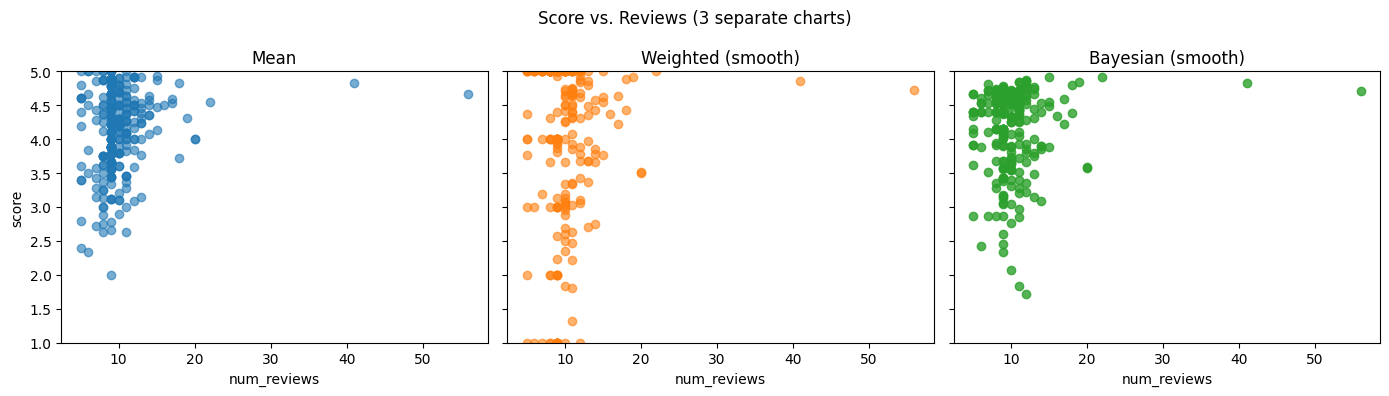

,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth
47,B00068R7W0,1.0,1.0,1.0,1.0,3.359143


,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth
49,B000EVIDUY,22.0,4.545455,4.72973,5.0,4.909562


In [6]:
# 可视化
req_cols = ['num_reviews','mean_score','weighted_mean_smooth','bayesian_mean_smooth']
sample_base = df_amazon_product_info.dropna(subset=[c for c in req_cols if c in df_amazon_product_info.columns])
sample = (sample_base
          .query('num_reviews>=5')
          .sample(min(300, len(sample_base)), random_state=42) if len(sample_base) > 0 else sample_base)

fig, axes = plt.subplots(1, 3, figsize=(14,4), sharex=True, sharey=True)
axes[0].scatter(sample['num_reviews'], sample['mean_score'], color='C0', alpha=0.6)
axes[0].set_title('Mean')
axes[1].scatter(sample['num_reviews'], sample['weighted_mean_smooth'], color='C1', alpha=0.6)
axes[1].set_title('Weighted (smooth)')
axes[2].scatter(sample['num_reviews'], sample['bayesian_mean_smooth'], color='C2', alpha=0.8)
axes[2].set_title('Bayesian (smooth)')
for ax in axes:
    ax.set_xlabel('num_reviews')
axes[0].set_ylabel('score')
axes[0].set_ylim(1,5)
plt.suptitle('Score vs. Reviews (3 separate charts)')
plt.tight_layout()
plt.show()

# 两个示例
one_review = df_amazon_product_info.query('num_reviews==1').head(1)
sort_key = 'weighted_mean_smooth' if 'weighted_mean_smooth' in df_amazon_product_info.columns else 'num_reviews'
many_reviews = (df_amazon_product_info.query('num_reviews>=20')
                .sort_values(sort_key, ascending=False)
                .head(1))
display(one_review[cols_show[:6]])
display(many_reviews[cols_show[:6]])

## 4. Correlation Between Ratings and Product Descriptions

### 4.1 Rating features
1. Mean Score: The score displayed on the product detail page.
    - Good Score: >= 4.5
2. Score Polarization: Indicates whether the ratings for this product are polarized.
    - Good Polarization: <= 0.25



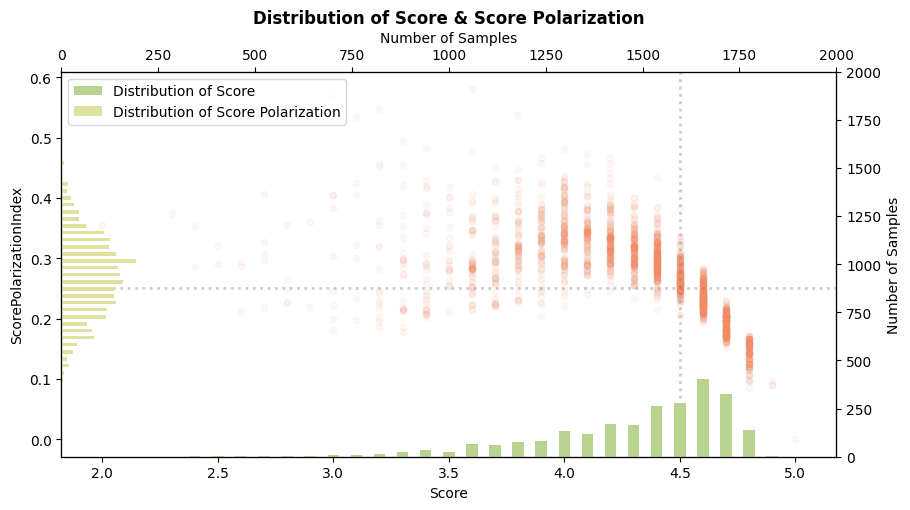

In [7]:
draw_product_score_distribution(df_amazon_product_info);

### 4.2 Visual Information Correlation

#### 4.2.1 Correlation with the number of sample images

- A statistical analysis was conducted on the relationship between the number of images in product descriptions and their ratings.
- The line chart illustrates how the proportion of positive reviews and the proportion of low-polarity ratings change with the number of images.

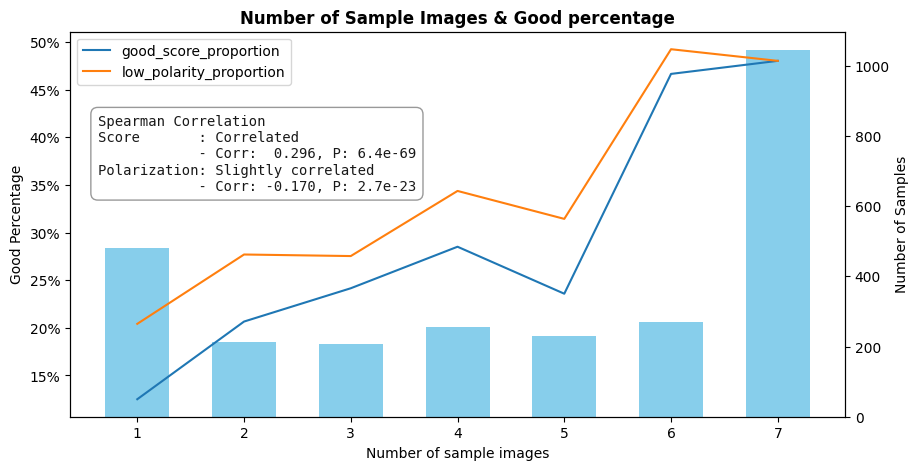

In [8]:
draw_correlation_with_n_images(df_amazon_product_info);

**Conclusion:** The number of images in product ratings and descriptions **<u>correlates positively</u>**. The more images included in the description, the greater the likelihood of the product receiving positive reviews.


### 4.3 Text Information Correlation

- **We use spearmanr to compute Correlation**
- **We analyse text information in 4 aspects**
    1. Correlation with description length
    2. Correlation with reading ease
    3. Correlation with the marketing tone of the description
    4. Correlation with product description items

#### 4.3.1 Correlation with description length


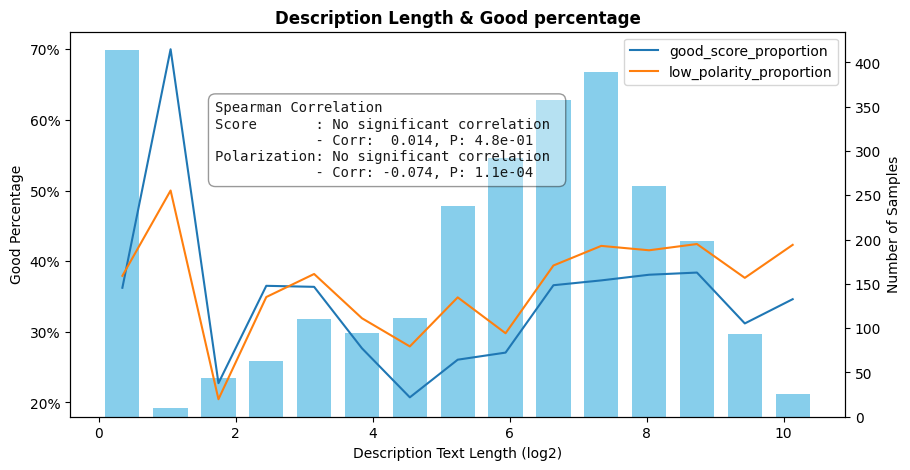

In [9]:
draw_correlation_with_description_length(df_amazon_product_info);

**Conclusion: There is <u>no significant correlation</u> between product ratings and the length of product descriptions.**



#### 4.3.2 Correlation with reading ease

**Types of reading ease:**
1. **flesch reading ease**: The higher the score, the easier it is to read.
2. **flesch kincaid grade**: The required grade level to read; The higher the number, the more difficult the reading level.
3. **gunning fog**: Long word ratio; The higher the ratio, the harder it is to understand.


,ease_index,compare_with,corr,p_value,conclusion
0,flesch_reading_ease,Score,0.016324,0.386284,No significant correlation
1,flesch_reading_ease,ScorePolarizationIndex,-0.018683,0.321381,No significant correlation
2,flesch_kincaid_grade,Score,0.012311,0.513501,No significant correlation
3,flesch_kincaid_grade,ScorePolarizationIndex,-0.013007,0.489990,No significant correlation
4,gunning_fog,Score,0.006578,0.727030,No significant correlation
5,gunning_fog,ScorePolarizationIndex,-0.007591,0.687042,No significant correlation


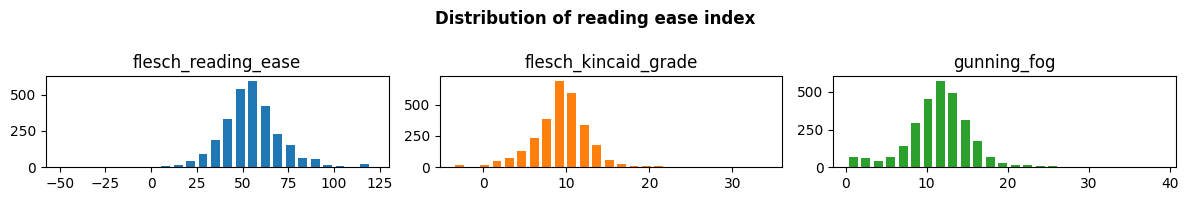

In [10]:
fig, df = get_correlation_with_reading_ease(df_amazon_product_info);
df

**Conclusion: Product ratings show <u>no significant correlation</u> with reading difficulty.**

#### 4.3.3 Correlation with the marketing tone of the description

**Types of marketing tone:**
1. **marketing tone score**: The proportion of exaggerated marketing language in product descriptions. The higher the score, the more exaggerated the marketing claims become.
2. **sentiment score by language model**: model name is `distilbert-base-uncased-finetuned-sst-2-english`, The higher the score, the more positive the emotion.


,sentiment_type,compare_with,corr,p_value,conclusion
1,marketing_tone_score,Score,0.058842,0.000651,No significant correlation
3,marketing_tone_score,ScorePolarizationIndex,-0.046915,0.006578,No significant correlation
0,sentiment_score,Score,0.078782,0.000005,No significant correlation
2,sentiment_score,ScorePolarizationIndex,-0.056808,0.000997,No significant correlation


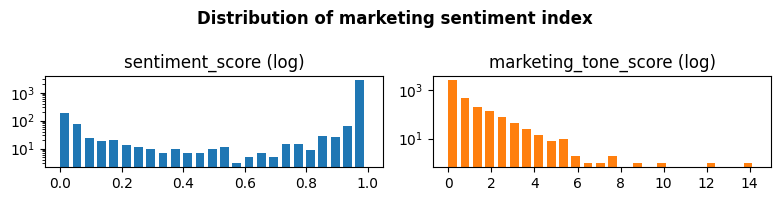

In [11]:
fig, df = get_correlation_with_marketing_sentiment(df_amazon_product_info)
df

**Conclusion:**
- Product ratings show <u>no significant correlation</u> with marketing tone/sentiment.
- However, since the metrics used to measure the emotional orientation of product descriptions do **not follow a normal distribution, <u>conclusions drawn from this basis may be unreliable</u>.**


#### 4.3.4 Correlation with product description items

> For this type of correlation where multiple labels correspond to a single value, regression models or correlation matrices could also be employed.
> However, to maintain consistency with previous implementations, we still use the Spearman method here.


6 of 18 items are correlated with Score/ScorePolarization


,item,compare_with,corr,p_value,conclusion
10,Best Sellers Rank,Score,0.380897,2.900556e-116,Highly correlated
30,Directions,Score,0.221054,2.120214e-38,Correlated
8,Item model number,Score,0.272143,4.947027e-58,Correlated
16,Package Dimensions,Score,-0.247264,6.662581e-48,Correlated
17,Package Dimensions,ScorePolarizationIndex,0.171696,1.319051e-23,Slightly correlated
14,Product Dimensions,Score,0.271464,9.670107e-58,Correlated
32,Safety Information,Score,0.161844,4.034171e-21,Slightly correlated


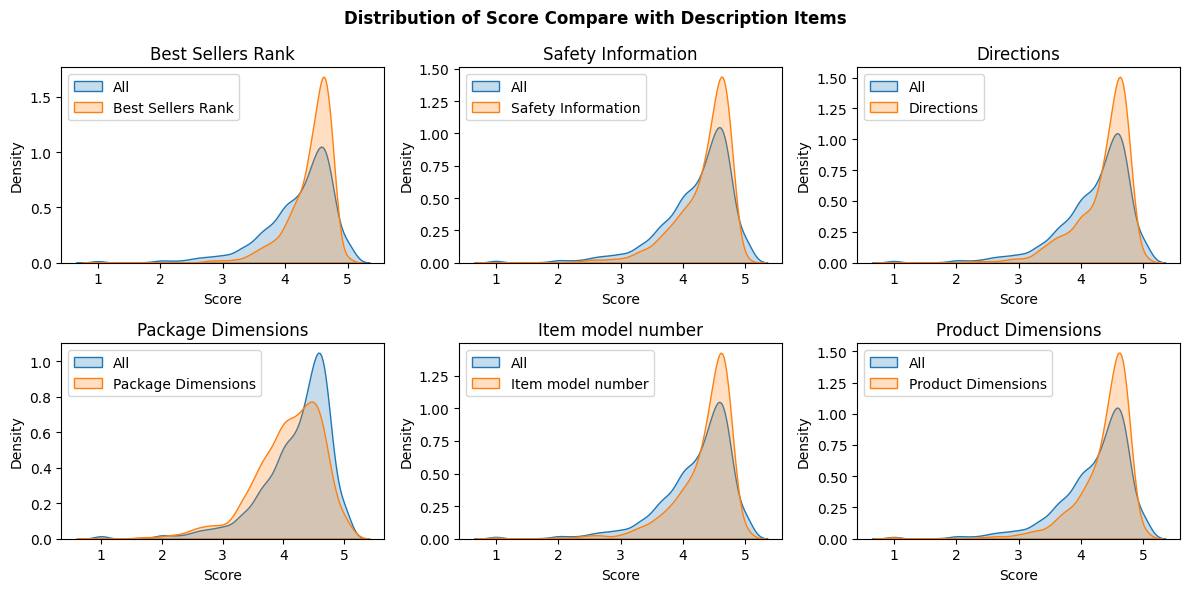

In [12]:
fig, df = get_correlation_with_description_item(df_amazon_product_info)
all_items = df['item'].unique()
df = df[df.conclusion != "No significant correlation"].drop(columns=["category", "num_samples"])
correlated_items = df['item'].unique()
print(f'{len(correlated_items)} of {len(all_items)} items are correlated with Score/ScorePolarization')
df

Conclusion:
1. Products with the following description items might have a better rating:
    - **Best Sellers Rank:** Only high-quality goods carry this label.
    - **Item model number:** Products with model numbers may be more formal and reliable.
    - **Product Dimensions:** Products with Product Dimensions may be more formal and reliable.
    - **Directions:** Products accompanied by directions may reduce negative reviews caused by users' inability to use or misuse the product.
    - **Safety Information:** Products with safety information may reduce negative reviews caused by user allergies.

2. Products with the following description items might have a lower rating:
    - **Package Dimensions:** Products with package dimensions may receive negative reviews due to logistics-related issues.

#### 4.3.5 Conclusion for Product Descriptions

|                   | For Sellers                                                                                                                | For Buyers                                                                                                                 |
|-------------------|----------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| Image             | Increase the number of product images                                                                                      | Choose products with more pictures                                                                                         |
| Descriptions Text | 1. Make product descriptions as professional as possible;<br>2. Provide more detailed safety information and instructions; | 1. Choose products that appear more professional;<br>2. Carefully read the product descriptions to avoid potential issues; |
|                   |                                                                                                                            |                                                                                                                            |